In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder, LabelEncoder, OneHotEncoder

In [7]:
df = pd.read_csv('data/HI-Small_Trans.csv')
df.head(2)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0


In [8]:
df['FromBankAcc'] = df.iloc[:,1].astype(str) + '_' + df.iloc[:,2]
df['ToBankAcc'] = df.iloc[:,3].astype(str) + '_' + df.iloc[:,4]

In [9]:
# # Ordinal Encoding
# encode_in_curr = OrdinalEncoder().fit(df['Receiving Currency'].to_numpy().reshape((-1,1))) # Receiving Currency
# encode_out_curr = OrdinalEncoder().fit(df['Payment Currency'].to_numpy().reshape((-1,1))) # Payment Currency
# encode_paym_format = OrdinalEncoder().fit(df['Payment Format'].to_numpy().reshape((-1,1))) # Payment Format

# # Target Encoding - deals with high-cardinality features
# encode_from_acct = OrdinalEncoder().fit(df['FromBankAcc'].to_numpy().reshape((-1,1)))
# encode_to_acct = OrdinalEncoder().fit(df['ToBankAcc'].to_numpy().reshape((-1,1)))
# encode_from_bank = OrdinalEncoder().fit(df['From Bank'].to_numpy().reshape((-1,1)))
# encode_to_bank = OrdinalEncoder().fit(df['To Bank'].to_numpy().reshape((-1,1)))

In [10]:
# Nominal Encoding
encode_in_curr = LabelEncoder().fit(df['Receiving Currency']) # Receiving Currency
encode_out_curr = LabelEncoder().fit(df['Payment Currency']) # Payment Currency
encode_paym_format = LabelEncoder().fit(df['Payment Format']) # Payment Format

# Nominal Encoding
encode_from_acct = LabelEncoder().fit(df['FromBankAcc']) # From Account
encode_to_acct = LabelEncoder().fit(df['ToBankAcc']) # To Account
encode_from_bank = LabelEncoder().fit(df['From Bank']) # From Bank
encode_to_bank = LabelEncoder().fit(df['To Bank']) # To Bank

In [17]:
clean_df = pd.DataFrame()

clean_df['From Account'] = encode_from_acct.transform(df['FromBankAcc'])
clean_df['To Account'] = encode_to_acct.transform(df['ToBankAcc'])
clean_df['From Bank'] = encode_from_bank.transform(df['From Bank'])
clean_df['To Bank'] = encode_to_bank.transform(df['To Bank'])
clean_df['Receiving Currency'] = encode_in_curr.transform(df['Receiving Currency'])
clean_df['Payment Currency'] = encode_in_curr.transform(df['Receiving Currency'])
clean_df['Payment Format'] = encode_paym_format.transform(df['Payment Format'])
clean_df['Timestamp'] = pd.to_datetime(df['Timestamp'])
clean_df['Amount Paid'] = df['Amount Paid']
clean_df['Amount Received'] = df['Amount Received']
clean_df['Is Laundering'] = df['Is Laundering']

clean_df.head()

,From Account,To Account,From Bank,To Bank,Receiving Currency,Payment Currency,Payment Format,Timestamp,Amount Paid,Amount Received,Is Laundering
0,6263,6386,8,8,12,12,5,2022-09-01 00:20:00,3697.34,3697.34,0
1,342898,172656,109,0,12,12,3,2022-09-01 00:20:00,0.01,0.01,0
2,343200,328327,110,106,12,12,5,2022-09-01 00:00:00,14675.57,14675.57,0
3,71212,72895,10,10,12,12,5,2022-09-01 00:02:00,2806.97,2806.97,0
4,6270,6394,8,8,12,12,5,2022-09-01 00:06:00,36682.97,36682.97,0


In [18]:
clean_df.describe()

,From Account,To Account,From Bank,To Bank,Receiving Currency,Payment Currency,Payment Format,Timestamp,Amount Paid,Amount Received,Is Laundering
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5078345,5.078345e+06,5.078345e+06,5.078345e+06
mean,2.285685e+05,1.950693e+05,1.948130e+03,1.650543e+03,8.382732e+00,8.382732e+00,3.042442e+00,2022-09-05 07:16:08.194274816,4.509273e+06,5.988726e+06,1.019427e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2022-09-01 00:00:00,1.000000e-06,1.000000e-06,0.000000e+00
25%,9.960400e+04,9.379700e+04,3.300000e+01,3.400000e+02,4.000000e+00,4.000000e+00,3.000000e+00,2022-09-02 04:32:00,1.844800e+02,1.833700e+02,0.000000e+00
50%,1.953000e+05,1.882960e+05,5.960000e+02,6.360000e+02,1.000000e+01,1.000000e+01,3.000000e+00,2022-09-05 12:16:00,1.414540e+03,1.411010e+03,0.000000e+00
75%,3.473080e+05,2.832440e+05,9.710000e+02,3.650000e+03,1.200000e+01,1.200000e+01,4.000000e+00,2022-09-08 03:13:00,1.229784e+04,1.234627e+04,0.000000e+00
max,4.969980e+05,4.206390e+05,3.046900e+04,1.581000e+04,1.400000e+01,1.400000e+01,6.000000e+00,2022-09-18 16:18:00,1.046302e+12,1.046302e+12,1.000000e+00
std,1.577862e+05,1.193042e+05,3.564369e+03,1.804398e+03,4.121243e+00,4.121243e+00,1.489543e+00,NaN,8.697728e+08,1.037183e+09,3.191219e-02


### Initial Pre-processing Steps

In [6]:
def mapValueToCategories(df, processed_df, columns):
    unique_values = pd.Series(df[columns].values.ravel('K')).unique()
    value_to_category_mapping = {value: category for category, value in enumerate(unique_values)}
    for column in columns:
        processed_df[column] = df[column].map(value_to_category_mapping)

processed_df = pd.DataFrame()
df['FromBankAcc'] = df.iloc[:,1].astype(str) + '_' + df.iloc[:,2]
df['ToBankAcc'] = df.iloc[:,3].astype(str) + '_' + df.iloc[:,4]
mapValueToCategories(df, processed_df, ['FromBankAcc', 'ToBankAcc'])
mapValueToCategories(df, processed_df, ['From Bank', 'To Bank'])
mapValueToCategories(df, processed_df, ['Receiving Currency'])
processed_df['xcur'] = df['Receiving Currency'] != df['Payment Currency']
mapValueToCategories(df, processed_df, ['Payment Format'])
processed_df['fee'] = (df['Amount Paid'] - df['Amount Received']).apply(lambda x: 0 if x == 0 else 1)
processed_df['TimestampCategory'] = pd.cut(pd.to_datetime(df['Timestamp']), bins=240, labels=False, right=False)
processed_df['Amount Received'] = df['Amount Received']
#processed_df['Amount Received'] = df['Amount Paid']
processed_df['Is Laundering'] = df['Is Laundering']

processed_df.head(3)

,FromBankAcc,ToBankAcc,From Bank,To Bank,Receiving Currency,xcur,Payment Format,fee,TimestampCategory,Amount Received,Is Laundering
0,0,0,0,0,0,False,0,0,0,3697.34,0
1,1,399662,1,4,0,False,1,0,0,0.01,0
2,2,2,2,2,0,False,0,0,0,14675.57,0


In [27]:
processed_df.describe()

,FromBankAcc,ToBankAcc,From Bank,To Bank,Receiving Currency,Payment Format,fee,TimestampCategory,Amount Received,Is Laundering
count,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06,5.078345e+06
mean,1.842298e+05,2.249016e+05,5.125000e+03,5.776632e+03,3.565970e+00,1.971657e+00,1.420896e-02,5.793539e+01,5.988726e+06,1.019427e-03
std,1.239693e+05,1.362909e+05,5.661364e+03,4.894785e+03,4.262324e+00,1.419516e+00,1.183515e-01,4.237138e+01,1.037183e+09,3.191219e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,0.000000e+00
25%,9.140200e+04,1.100000e+05,1.380000e+02,1.295000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.600000e+01,1.833700e+02,0.000000e+00
50%,1.856680e+05,2.212900e+05,2.776000e+03,4.973000e+03,2.000000e+00,2.000000e+00,0.000000e+00,6.100000e+01,1.411010e+03,0.000000e+00
75%,2.760030e+05,3.251430e+05,9.851000e+03,9.960000e+03,6.000000e+00,3.000000e+00,0.000000e+00,9.600000e+01,1.234627e+04,0.000000e+00
max,4.969980e+05,5.150870e+05,3.046900e+04,3.032200e+04,1.400000e+01,6.000000e+00,1.000000e+00,2.390000e+02,1.046302e+12,1.000000e+00


In [8]:
processed_df['fee'].value_counts()

fee
0    5006187
1      72158
Name: count, dtype: int64

In [15]:
processed_df['To Bank'].value_counts()

To Bank
0        42547
3        41872
1436     38721
29       30625
4        30115
         ...  
16245        1
10190        1
16248        1
16253        1
16848        1
Name: count, Length: 15811, dtype: int64

<Axes: ylabel='Frequency'>

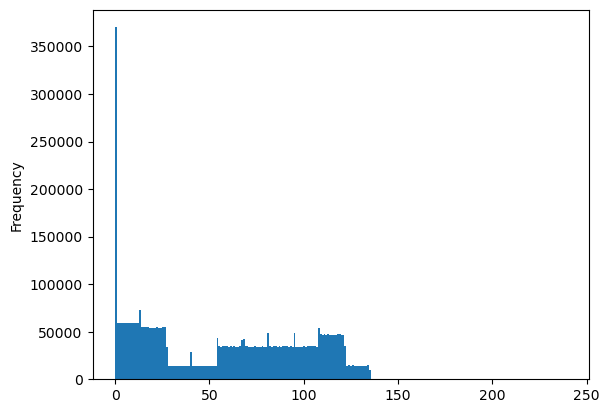

In [52]:
processed_df['TimestampCategory'].plot.hist(bins=240)